In [1]:
import os
import glob
import soundfile as sf
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import IPython
%matplotlib inline

# === PARAMETERS ===
DATA_PATH = "/kaggle/input/audio-files/wavs"  # your folder with WAV files

# === FUNCTIONS ===







In [2]:
def compute_snr(wav_file):
    """
    Estimate SNR of a WAV file using a simple method:
    SNR = 10 * log10(signal_power / noise_power)
    Here, noise is estimated as low-energy parts of the audio.
    """
    wav, sr = sf.read(wav_file)
    if len(wav.shape) == 2:
        wav = wav[:, 0]  # convert to mono if stereo

    # simple noise estimate: consider 10% lowest amplitude samples as noise
    abs_wav = np.abs(wav)
    noise_thresh = np.percentile(abs_wav, 10)
    noise = wav[abs_wav <= noise_thresh]
    signal = wav[abs_wav > noise_thresh]

    if len(noise) == 0:  # avoid division by zero
        noise = np.array([1e-10])

    snr = 10 * np.log10(np.mean(signal**2) / np.mean(noise**2))
    return snr, wav_file

In [3]:
# === LOAD WAV FILES ===
wav_files = glob.glob(os.path.join(DATA_PATH, "*.wav"))
print(f" > Number of WAV files: {len(wav_files)}")

# === COMPUTE SNR ===
file_snrs = [compute_snr(f) for f in tqdm(wav_files)]
snrs = [f[0] for f in file_snrs]
file_names = [f[1] for f in file_snrs]

print(f" > Average SNR: {np.mean(snrs):.2f} dB")

# === SHOW WORST AND BEST FILES ===
file_idxs = np.argsort(snrs)

 > Number of WAV files: 6386


100%|██████████| 6386/6386 [02:43<00:00, 39.01it/s]

 > Average SNR: 39.37 dB


In [4]:
def display_audio(idx):
    file_idx = file_idxs[idx]
    file_name = file_names[file_idx]
    wav, sr = sf.read(file_name)
    if len(wav.shape) == 2:
        wav = wav[:, 0]  # convert to mono
    print(f"{file_name} - SNR: {snrs[file_idx]:.2f} dB")
    IPython.display.display(IPython.display.Audio(wav, rate=sr))


=== Worst SNR files ===
/kaggle/input/audio-files/wavs/sinh_5324.wav - SNR: 25.73 dB


/kaggle/input/audio-files/wavs/sinh_5326.wav - SNR: 25.85 dB


/kaggle/input/audio-files/wavs/sinh_5940.wav - SNR: 25.89 dB


/kaggle/input/audio-files/wavs/sinh_5325.wav - SNR: 26.00 dB


/kaggle/input/audio-files/wavs/sinh_5375.wav - SNR: 26.02 dB


=== Best SNR files ===
/kaggle/input/audio-files/wavs/sinh_6158.wav - SNR: 65.68 dB


/kaggle/input/audio-files/wavs/sinh_5622.wav - SNR: 62.16 dB


/kaggle/input/audio-files/wavs/sinh_6409.wav - SNR: 62.01 dB


/kaggle/input/audio-files/wavs/sinh_6113.wav - SNR: 60.94 dB


/kaggle/input/audio-files/wavs/sinh_6318.wav - SNR: 60.93 dB


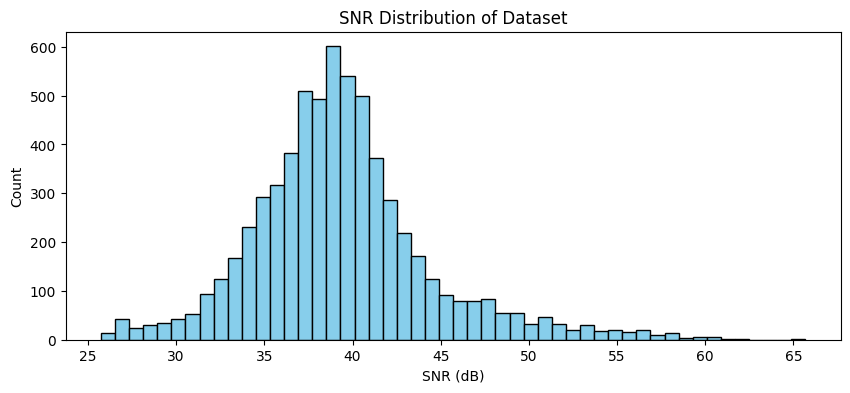

In [5]:
# worst 5 recordings
print("=== Worst SNR files ===")
for i in range(5):
    display_audio(i)

# best 5 recordings
print("=== Best SNR files ===")
for i in range(5):
    display_audio(-i-1)

# plot histogram
plt.figure(figsize=(10,4))
plt.hist(snrs, bins=50, color='skyblue', edgecolor='k')
plt.title("SNR Distribution of Dataset")
plt.xlabel("SNR (dB)")
plt.ylabel("Count")
plt.show()
